# Chapter 5. Scatter Plots

> Scatter plots are used to display the relationship between two continuous variables. Often, a scatter plot will also have a line showing the predicted values based on some statistical model.

> With large data sets, plotting every single observation in the data set can result in overplotting, when points overlap and obscure one another. To deal with the problem of overplotting, you’ll probably want to summarize the data before displaying it.

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 5.1 Making a Basic Scatter Plot

In [2]:
summary(gcookbook::heightweight)
slice_sample(gcookbook::heightweight, n = 10)
?gcookbook::heightweight

 sex        ageYear         ageMonth        heightIn        weightLb    
 f:111   Min.   :11.58   Min.   :139.0   Min.   :50.50   Min.   : 50.5  
 m:125   1st Qu.:12.33   1st Qu.:148.0   1st Qu.:58.73   1st Qu.: 85.0  
         Median :13.58   Median :163.0   Median :61.50   Median :100.5  
         Mean   :13.67   Mean   :164.1   Mean   :61.34   Mean   :101.0  
         3rd Qu.:14.83   3rd Qu.:178.0   3rd Qu.:64.30   3rd Qu.:112.0  
         Max.   :17.50   Max.   :210.0   Max.   :72.00   Max.   :171.5  

sex,ageYear,ageMonth,heightIn,weightLb
<fct>,<dbl>,<int>,<dbl>,<dbl>
f,13.92,167,62.3,92.5
f,12.50,150,61.3,94.0
f,12.25,147,58.3,111.5
m,13.00,156,68.5,114.0
f,12.25,147,55.8,75.0
m,14.50,174,69.8,119.5
m,13.17,158,65.0,121.0
f,14.83,178,63.5,148.5
m,12.50,150,60.8,128.0


heightweight {gcookbook},R Documentation


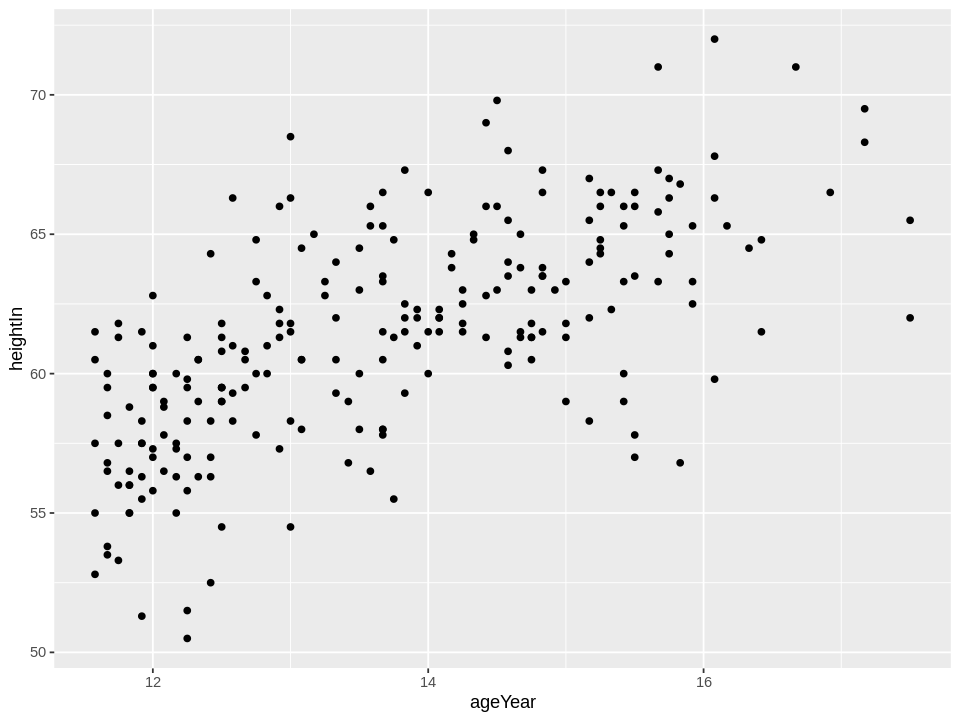

In [3]:
qplot(ageYear, heightIn, data = gcookbook::heightweight)

## 5.2 Grouping Points Together Using Shapes or Colors

> You want to visually group points by some variable (the grouping variable), using different shapes or colors.

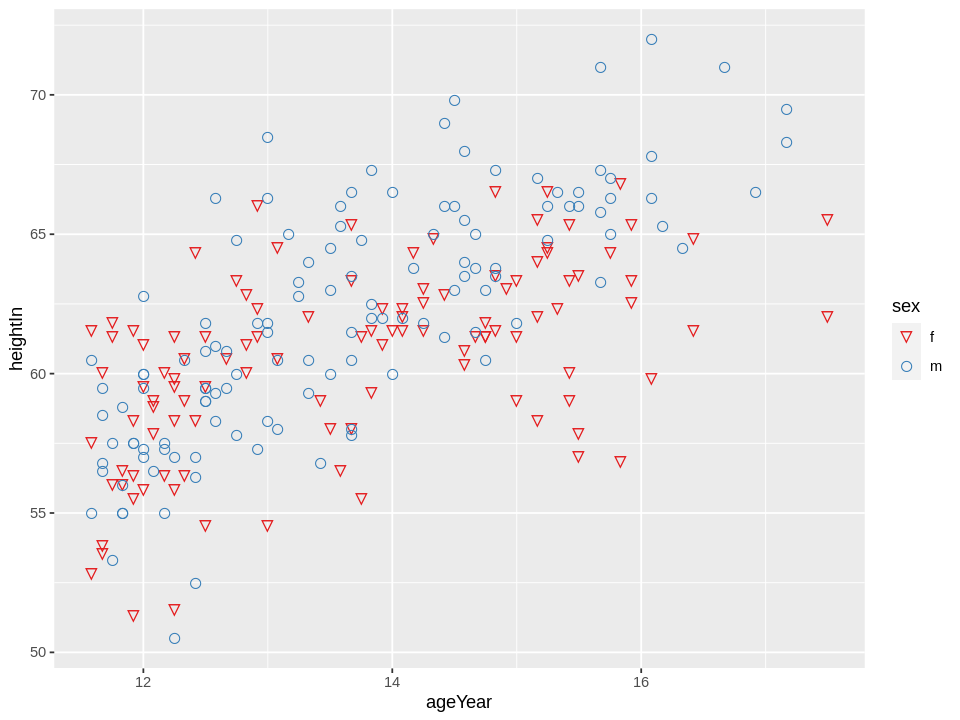

In [4]:
ggplot(gcookbook::heightweight, aes(ageYear, heightIn, color = sex, shape = sex)) +
  geom_point(size = 5) +
  scale_color_brewer(palette = "Set1") +
  scale_shape_manual(values = c("▿", "○"))

## 5.3 Using Different Point Shapes

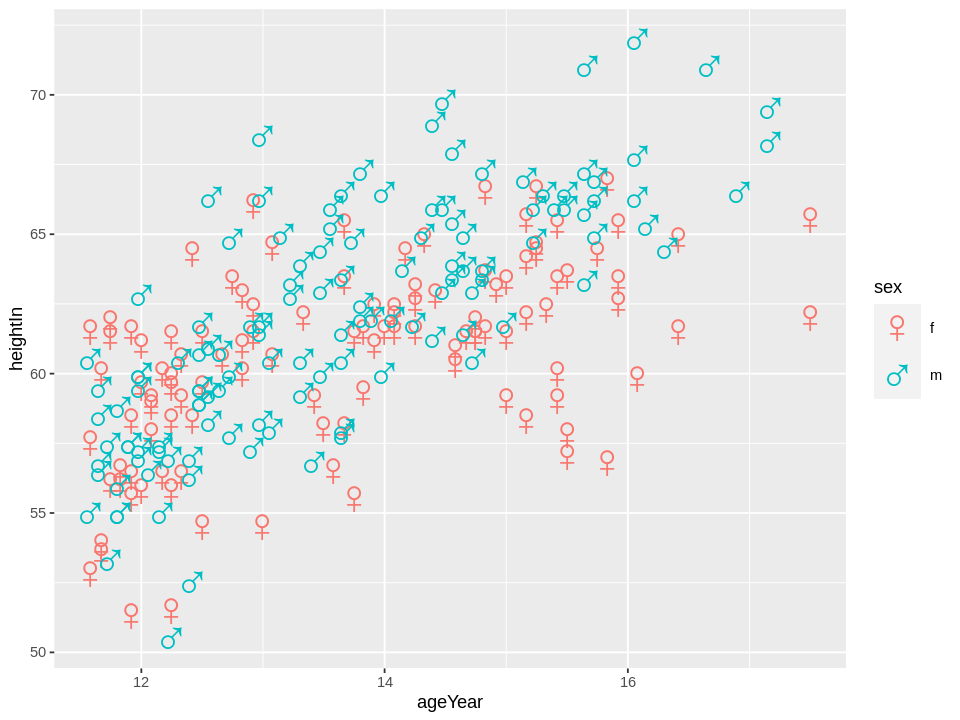

In [5]:
ggplot(gcookbook::heightweight, aes(ageYear, heightIn, color = sex, shape = sex)) +
  geom_point(size = 10) +
  scale_shape_manual(values = c("♀", "♂"))

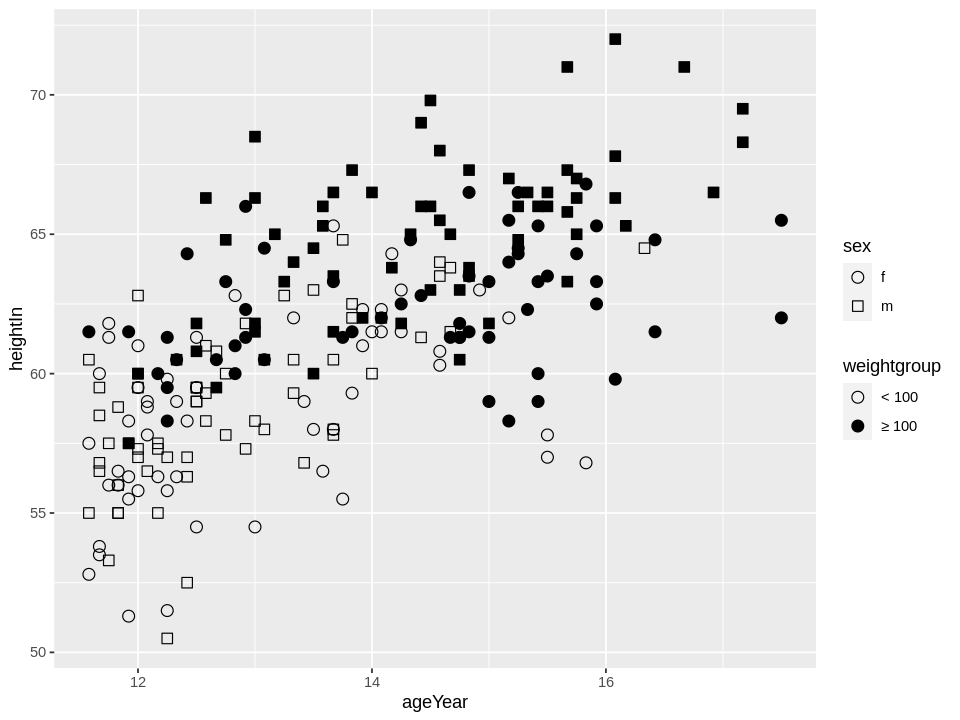

In [6]:
mutate(gcookbook::heightweight, weightgroup = ifelse(weightLb < 100, "< 100", "≥ 100")) %>%
  ggplot(aes(ageYear, heightIn, fill = weightgroup, shape = sex)) +
  geom_point(size = 3) +
  scale_fill_manual(
    values = c(NA, "black"),
    guide = guide_legend(override.aes = list(shape = 21))
  ) +
  scale_shape_manual(values = c(21, 22)) 

## 5.4 Mapping a Continuous Variable to Color or Size

> Humans can easily perceive small differences in spatial position, so we can interpret the variables mapped to `x` and `y` coordinates with high precision. Humans aren’t as good at perceiving small differences in `size` and `colour` though, so we will interpret variables mapped to these aesthetic attributes with much lower precision. Therefore, when you map a variable to `size` or `colour`, make sure it is a variable where high precision is not very important for correctly intepreting the data.

> There is another consideration when mapping a variable to `size`, which is that the results can be perceptually misleading. While the largest dots in Figure 5-8 are about 36 times the size of the smallest ones, they are only supposed to represent about 3.5 times the weight of the smallest dots.

> When a variable is mapped to `size`, it’s a good idea to not map a variable to `shape`. This is because it is difficult to compare the sizes of different shapes; for example, a size 4 triangle could appear larger than a size 3.5 circle. Also, some of the shapes really are different sizes: shapes 16 and 19 are both circles, but at any given numeric size, shape 19 circles are visually larger than shape 16 circles.

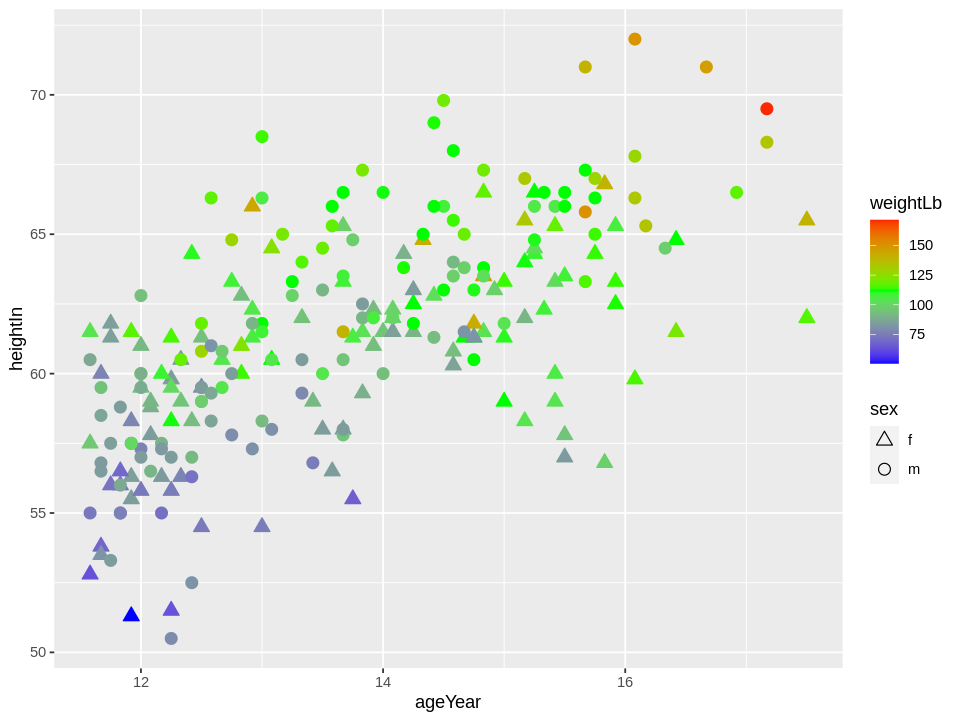

In [7]:
ggplot(gcookbook::heightweight, aes(ageYear, heightIn, color = weightLb, fill = weightLb, shape = sex)) +
  geom_point(size = 3) +
  scale_color_gradient2(high = "red", low = "blue", mid = "green", midpoint = quantile(gcookbook::heightweight$weightLb, .75)) +
  scale_fill_gradient2(high = "red", low = "blue", mid = "green", midpoint = quantile(gcookbook::heightweight$weightLb, .75)) +
  scale_shape_manual(values = c(24, 21))

## 5.5 Dealing with Overplotting

> With large data sets, the points in a scatter plot may overlap and obscure each other and prevent the viewer from accurately assessing the distribution of the data. This is called *overplotting*. If the amount of overplotting is low, you may be able to alleviate the problem by using smaller points, or by using a different shape (like shape 1, a hollow circle) through which other points can be seen.

> If there’s a high degree of overplotting, there are a number of possible solutions:
> - Make the points semitransparent
> - Bin the data into rectangles (better for quantitative analysis)
> - Bin the data into hexagons
> - Use box plots

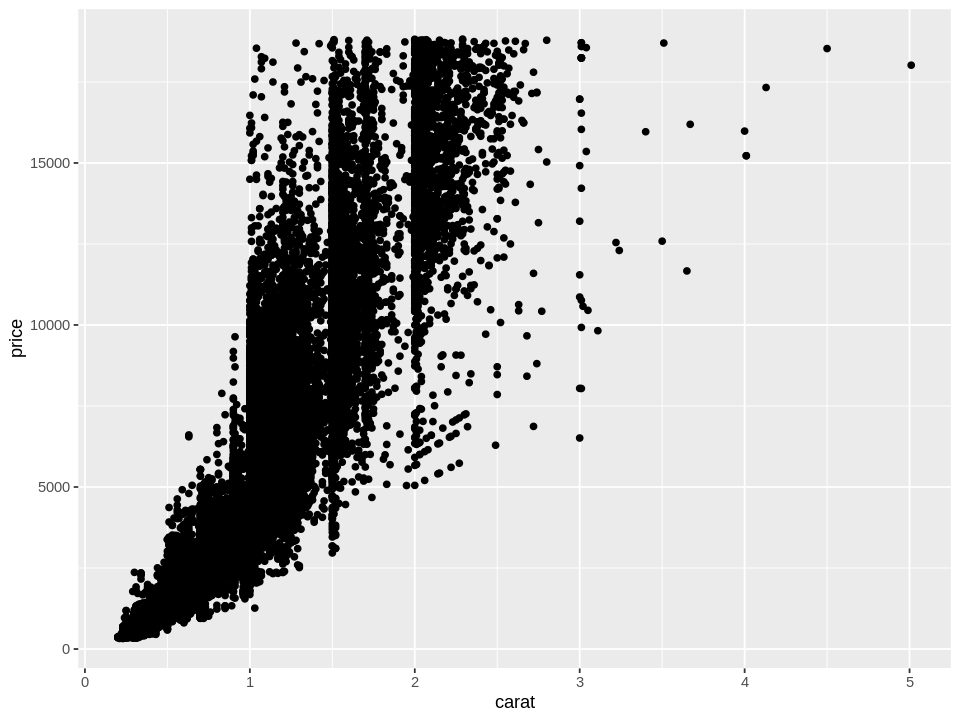

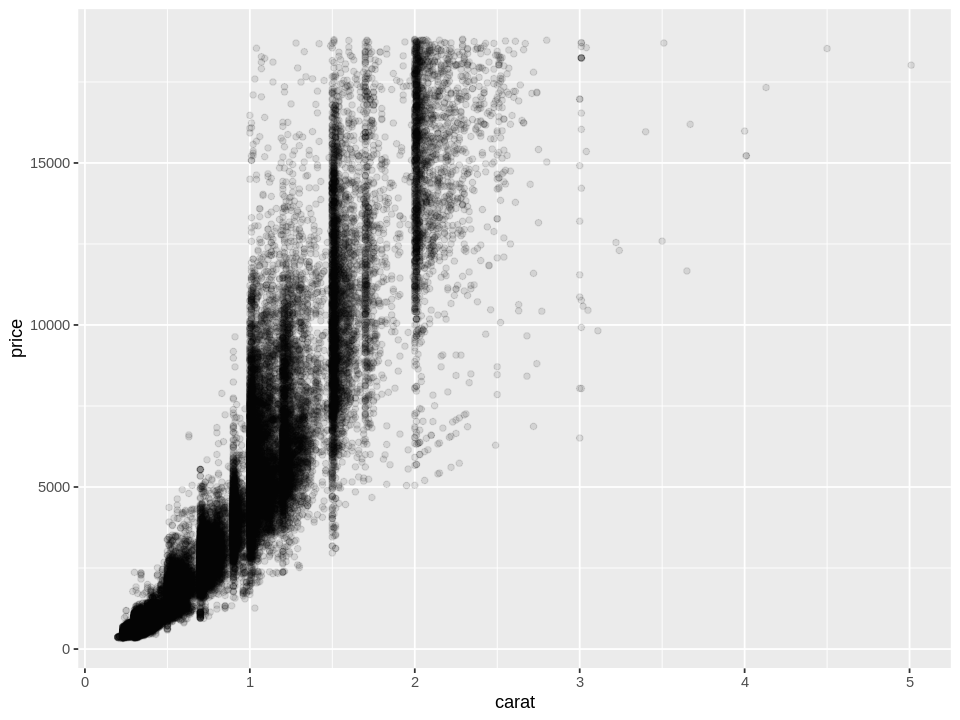

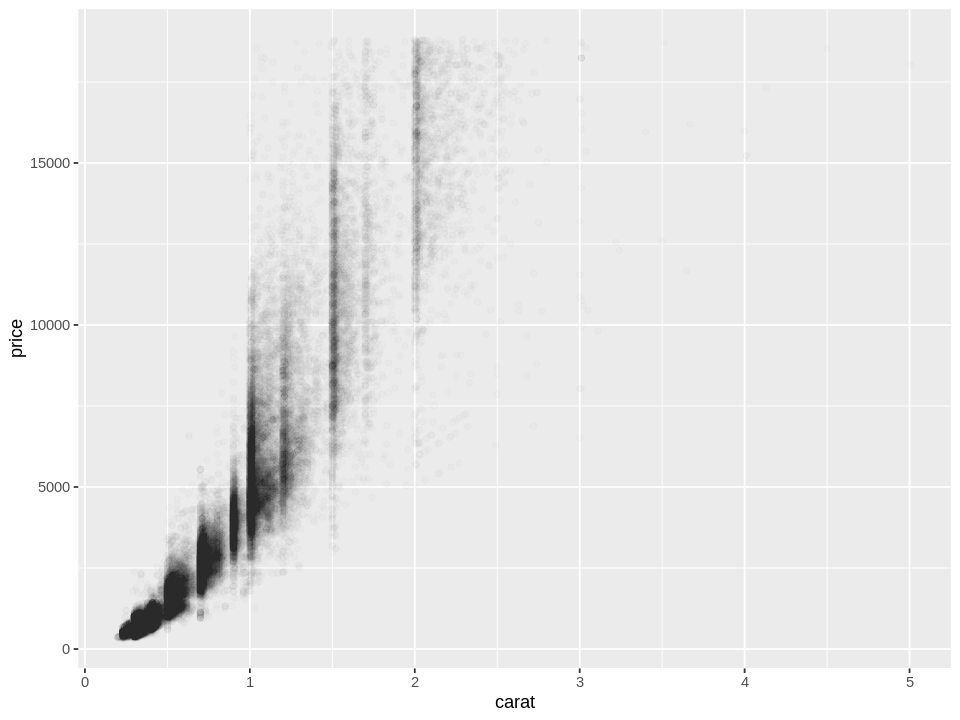

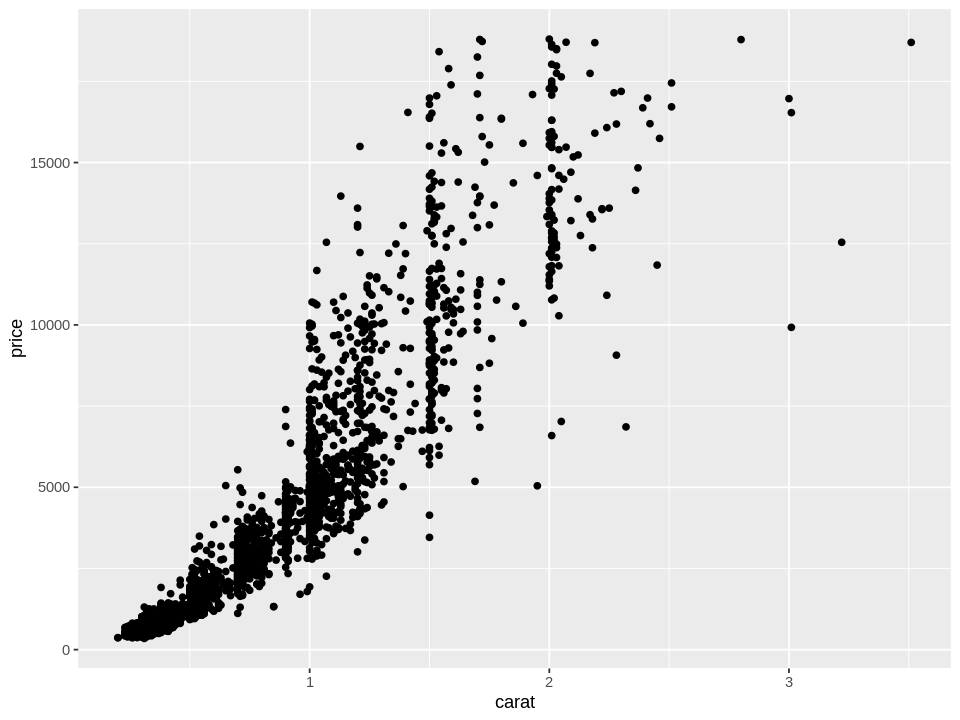

In [8]:
qplot(carat, price, data = diamonds)
ggplot(diamonds, aes(carat, price)) + geom_point(alpha = .1)
ggplot(diamonds, aes(carat, price)) + geom_point(alpha = .01)

set.seed(0)
slice_sample(diamonds, prop = .05) %>% qplot(carat, price, data = .)

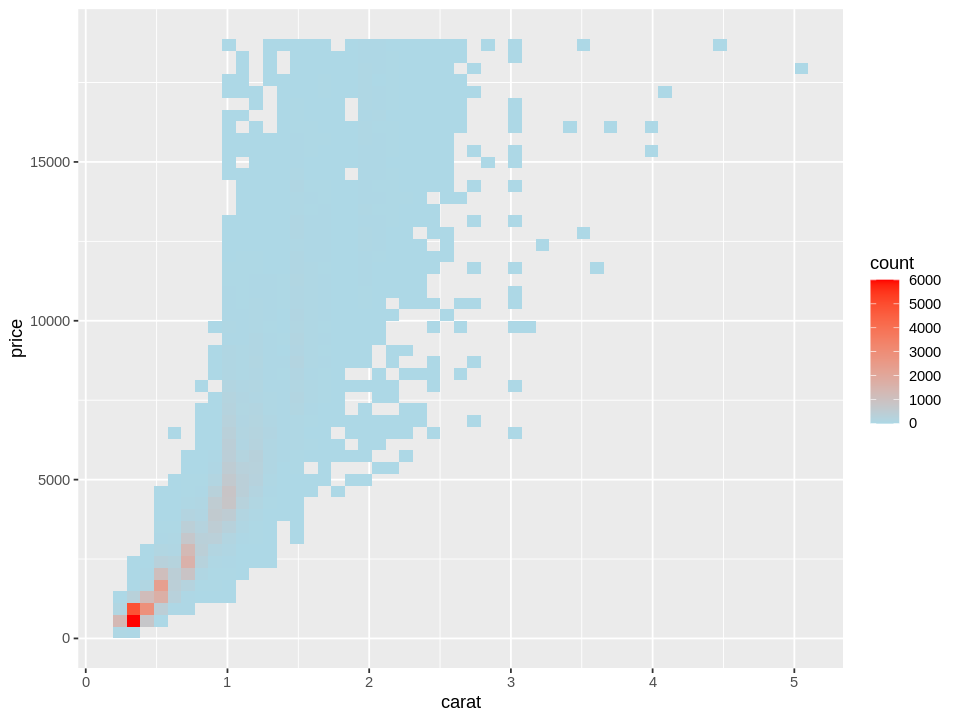

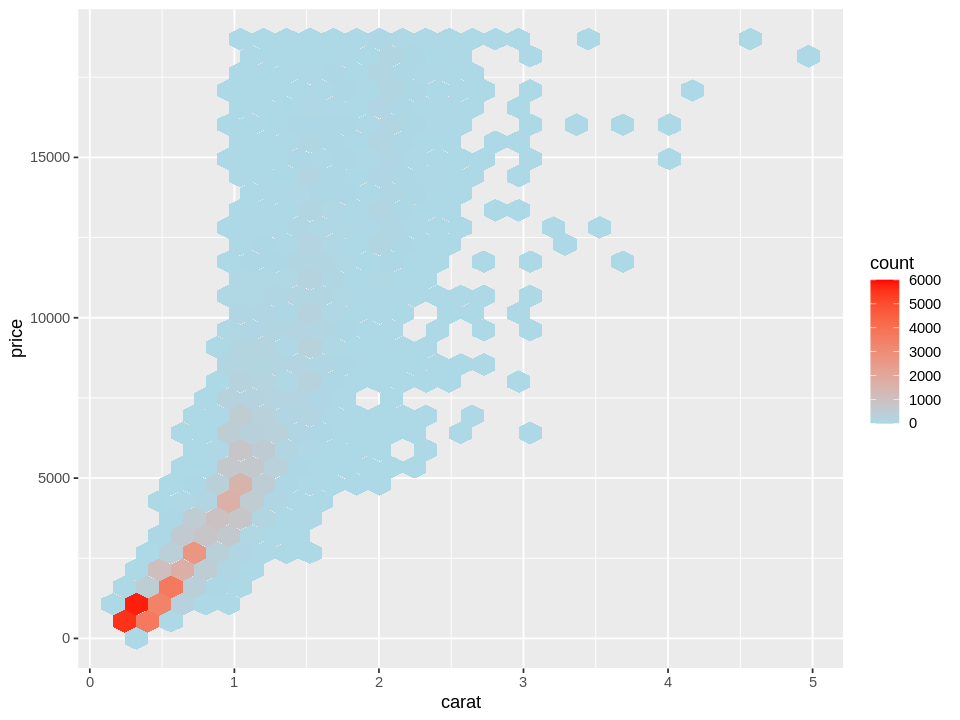

In [9]:
qplot(carat, price, data = diamonds, geom = "bin2d", bins = 50) +
  scale_fill_gradient(high = "red", limits = c(0, 6000), low = "lightblue")

qplot(carat, price, data = diamonds, geom = "hex") +
  scale_fill_gradient(high = "red", limits = c(0, 6000), low = "lightblue")

> Overplotting can also occur when the data is *discrete* on one or both axes. In these cases, you can randomly *jitter* the points with `position_jitter()`.

In [10]:
summary(ChickWeight)
slice_sample(ChickWeight, n = 10)
?ChickWeight

     weight           Time           Chick     Diet   
 Min.   : 35.0   Min.   : 0.00   13     : 12   1:220  
 1st Qu.: 63.0   1st Qu.: 4.00   9      : 12   2:120  
 Median :103.0   Median :10.00   20     : 12   3:120  
 Mean   :121.8   Mean   :10.72   10     : 12   4:118  
 3rd Qu.:163.8   3rd Qu.:16.00   17     : 12          
 Max.   :373.0   Max.   :21.00   19     : 12          
                                 (Other):506          

weight,Time,Chick,Diet
<dbl>,<dbl>,<ord>,<fct>
199,20,1,1
84,8,8,1
98,8,38,3
45,2,16,1
231,20,46,4
163,10,21,2
96,14,10,1
51,2,44,4
146,12,7,1


ChickWeight {datasets},R Documentation


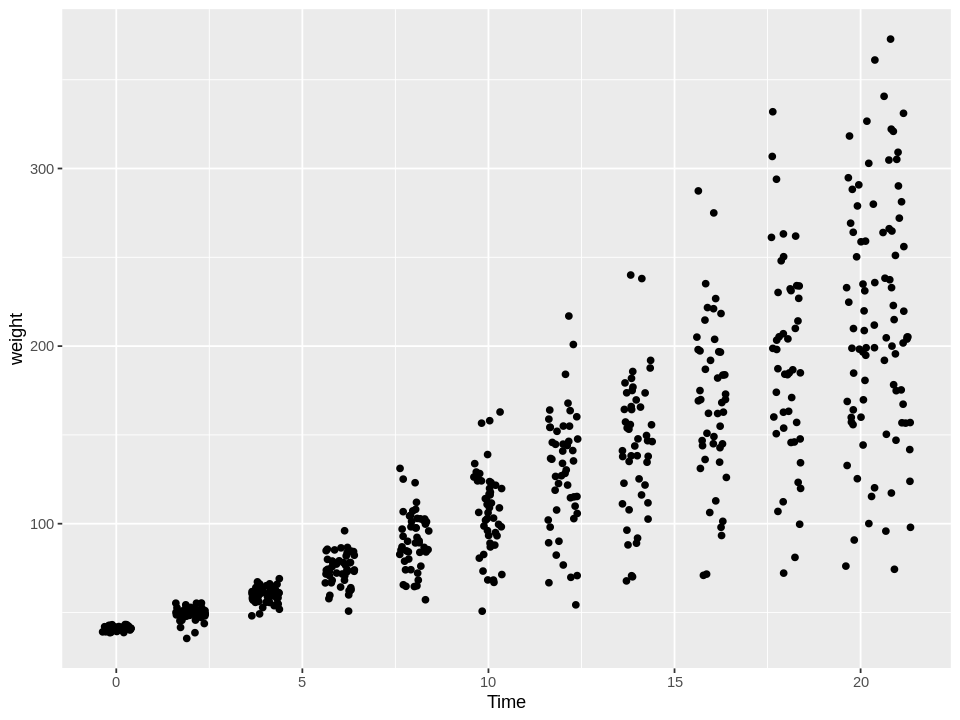

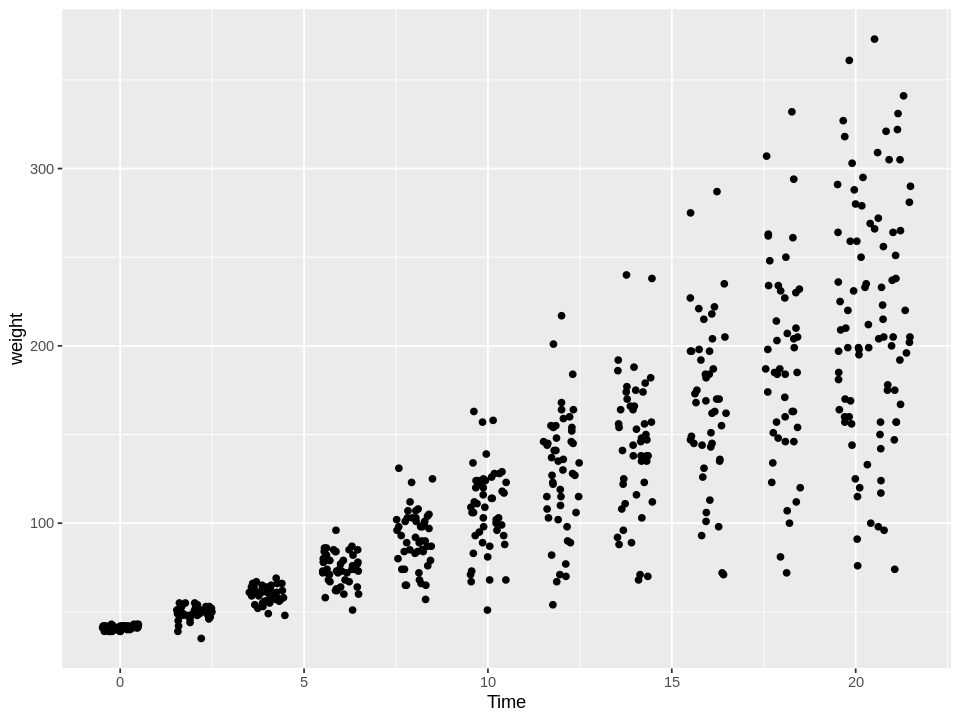

In [11]:
qplot(Time, weight, data = ChickWeight, geom = "jitter")

ggplot(ChickWeight, aes(Time, weight)) +
  geom_point(position = position_jitter(height = .0, width = .5)) 

> When the data has one discrete axis and one continuous axis, it might make sense to use box plots. This will convey a different story than a standard scatter plot because a box plot will obscure the *number* of data points at each location on the discrete axis. This may be problematic in some cases, but desirable in others.

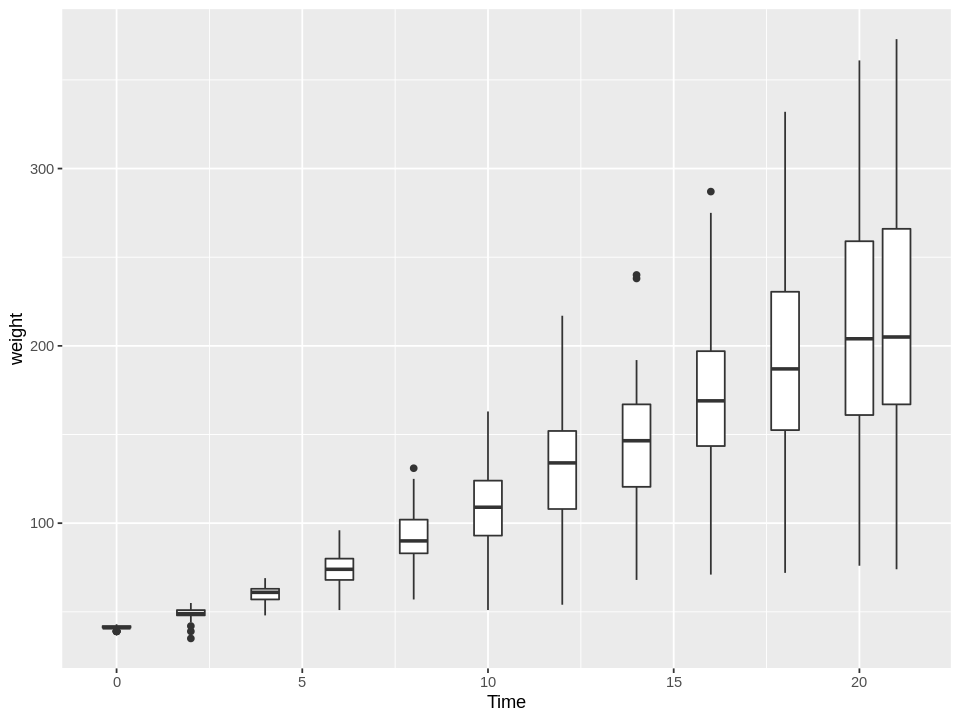

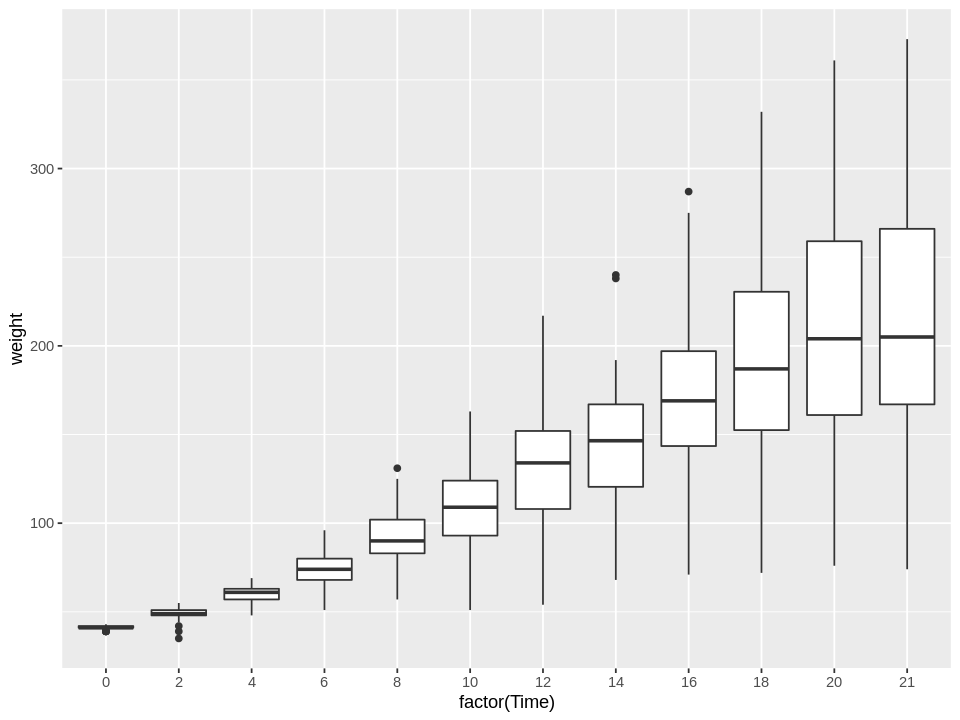

In [12]:
qplot(Time, weight, group = Time, data = ChickWeight, geom = "boxplot")
qplot(factor(Time), weight, data = ChickWeight, geom = "boxplot")

## 5.6 Adding Fitted Regression Model Lines

> Notice that the blue line, for males, doesn’t run all the way to the right side of the plot. There are two reasons for this. The first is that, by default, `stat_smooth()` limits the prediction to within the range of the predictor data on the x-axis. The second is that even if it extrapolates, the `loess()` function only offers prediction within the *x* range of the data.

> In this example with the `heightweight` data set, the default settings for `stat_smooth()` (with `loess` and no extrapolation) may make more sense than the extrapolated linear predictions, because humans don’t grow linearly and we don’t grow forever.

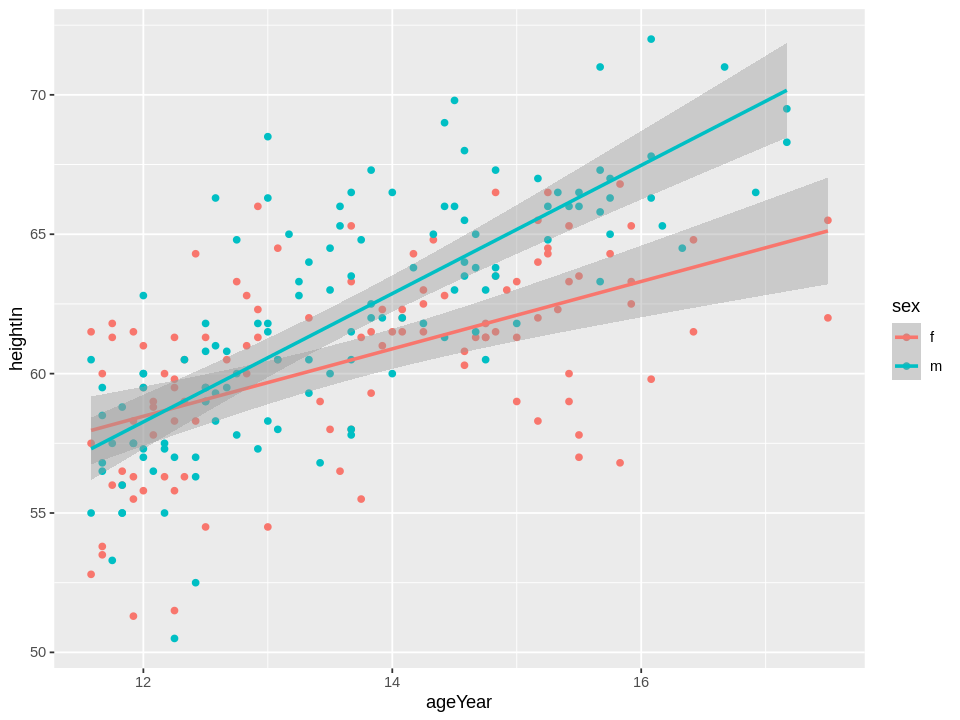

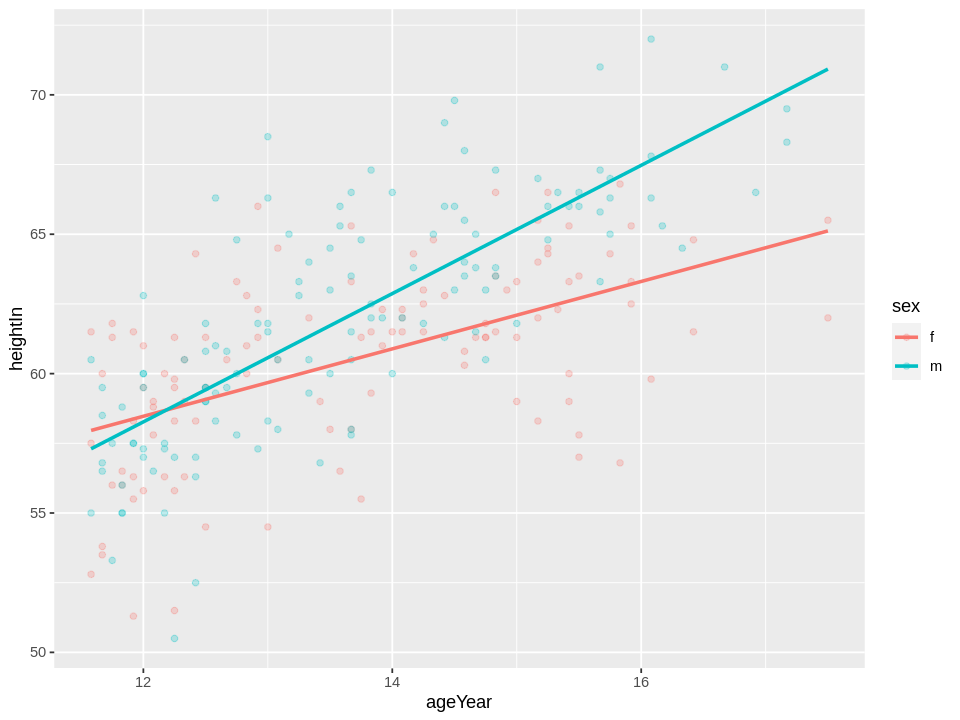

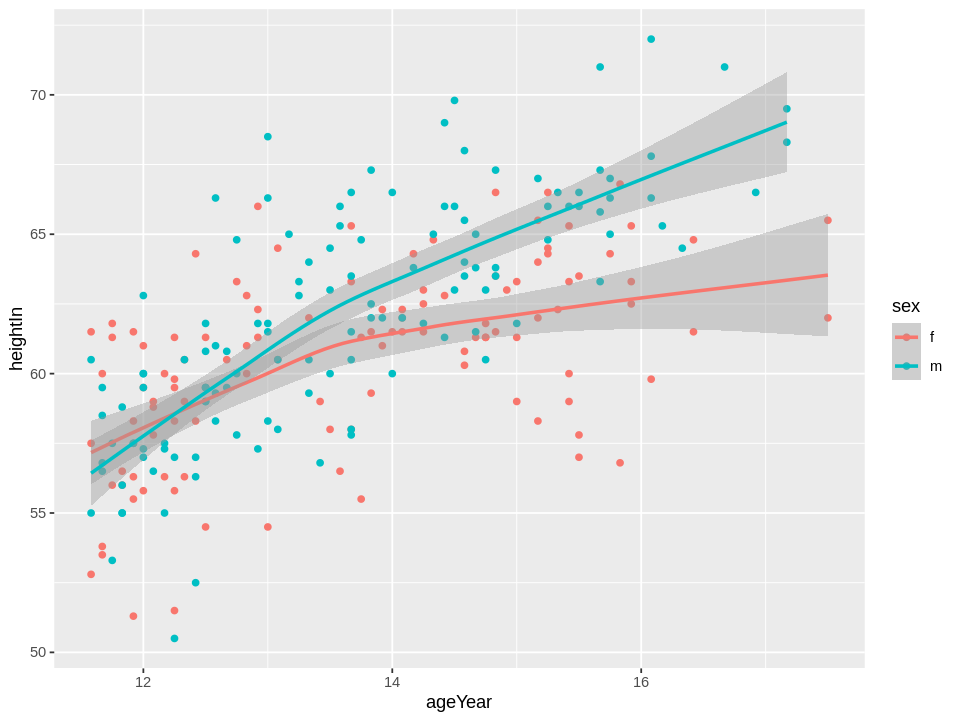

In [13]:
qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  geom_smooth(formula = y ~ x, level = .99, method = lm)

ggplot(gcookbook::heightweight, aes(ageYear, heightIn, color = sex)) +
  geom_point(alpha = .25) +
  geom_smooth(formula = y ~ x, fullrange = TRUE, method = lm, se = FALSE)

qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  geom_smooth(formula = y ~ x, method = loess, method.args = list(degree = 1))

In [14]:
summary(MASS::biopsy)
slice_sample(MASS::biopsy, n = 10)
?MASS::biopsy

      ID                  V1               V2               V3        
 Length:699         Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 Class :character   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median : 1.000   Median : 1.000  
                    Mean   : 4.418   Mean   : 3.134   Mean   : 3.207  
                    3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000  
                    Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                      
       V4               V5               V6               V7        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000  
 Median : 1.000   Median : 2.000   Median : 1.000   Median : 3.000  
 Mean   : 2.807   Mean   : 3.216   Mean   : 3.545   Mean   : 3.438  
 3rd Qu.: 4.000   3rd Qu.: 4.000   3rd Qu.: 6.000   3rd Qu.: 5.000  
 Max.   :10.000   

ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1231706,8,4,6,3,3,1,4,3,1,benign
1182404,4,1,1,1,2,1,2,1,1,benign
1172152,10,3,3,10,2,10,7,3,3,malignant
63375,9,1,2,6,4,10,7,7,2,malignant
1110503,5,5,5,8,10,8,7,3,7,malignant
352431,10,5,10,3,5,8,7,8,3,malignant
1313982,4,3,1,1,2,1,4,8,1,benign
635844,8,4,10,5,4,4,7,10,1,malignant
1267898,5,1,3,1,2,1,1,1,1,benign


biopsy {MASS},R Documentation


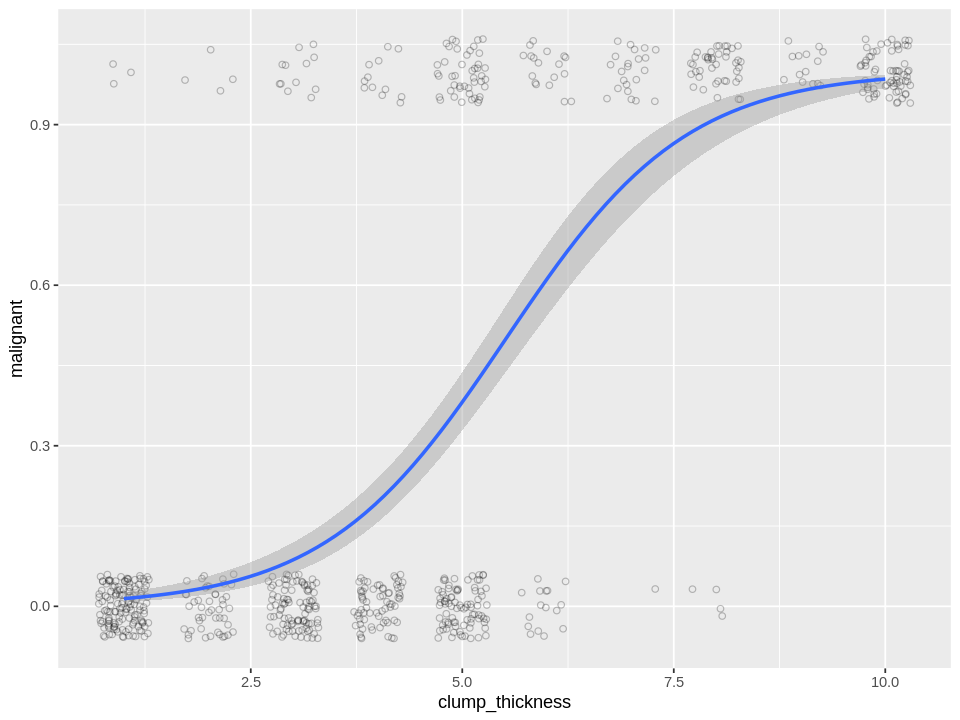

In [15]:
transmute(
  MASS::biopsy,
  clump_thickness = V1,
  malignant = recode(class, benign = 0, malignant = 1)
) %>%
  ggplot(aes(clump_thickness, malignant)) +
  geom_point(alpha = .25, position = position_jitter(height = .06, width = .3), shape = 21, size = 1.5) +
  geom_smooth(formula = y ~ x, method = glm, method.args = list(family = binomial))

## 5.7 Adding Fitted Lines from an Existing Model

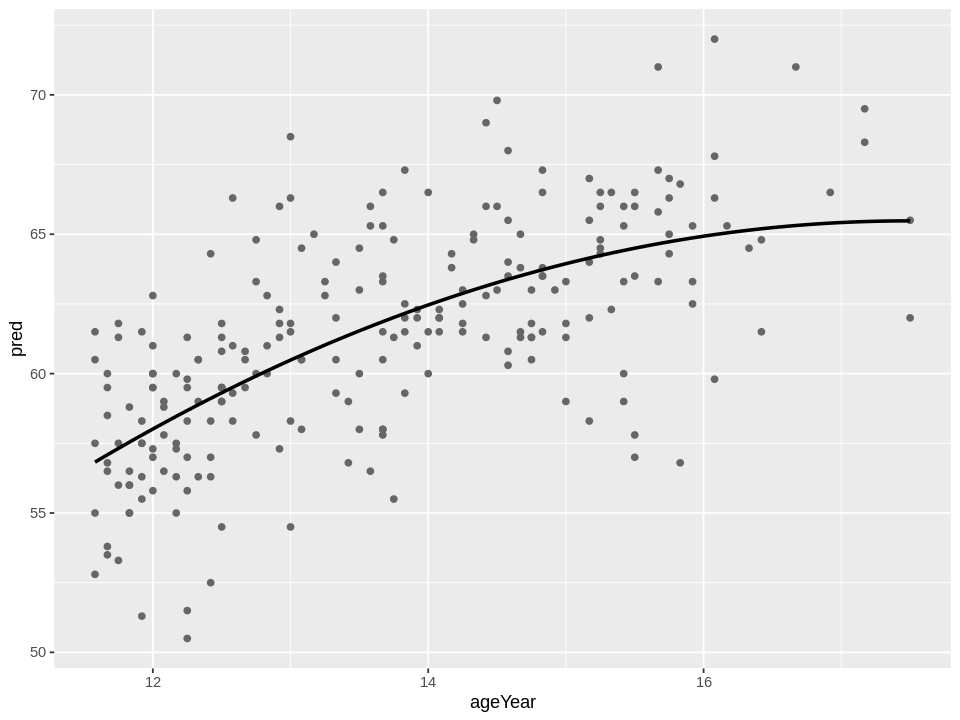

In [16]:
modelr::add_predictions(
  tibble(
    ageYear = seq(
      min(gcookbook::heightweight$ageYear),
      max(gcookbook::heightweight$ageYear),
      length.out = 100
    )
  ),
  lm(
    heightIn ~ ageYear + I(ageYear^2),
    gcookbook::heightweight
  )
) %>%
  ggplot(aes(ageYear, pred)) +
  geom_point(aes(ageYear, heightIn), gcookbook::heightweight, color = "grey40") +
  geom_line(size = 1)

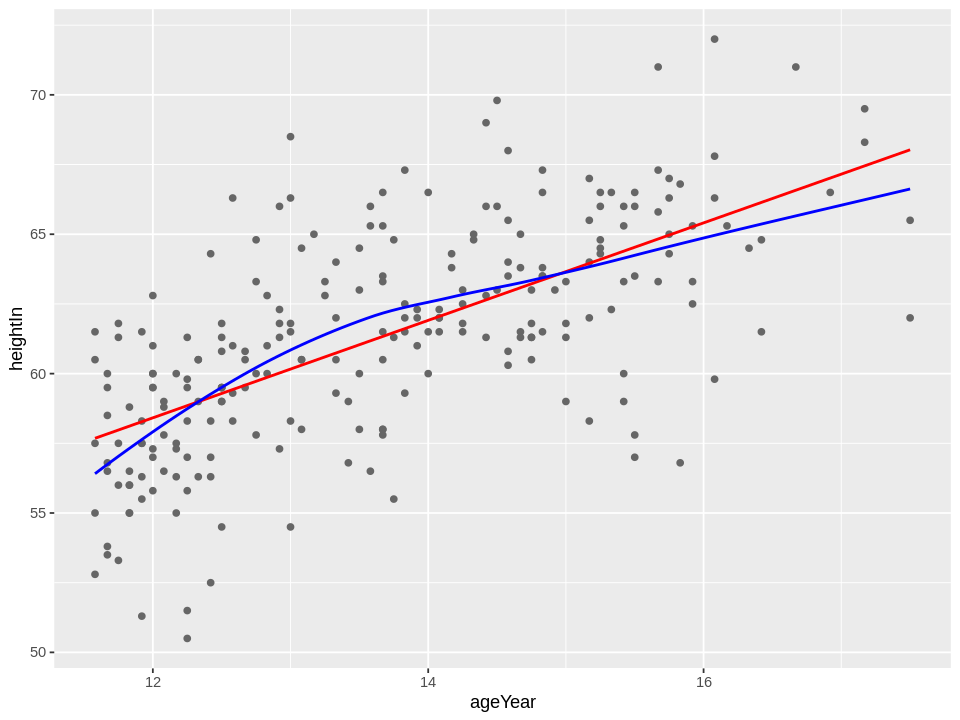

In [17]:
tibble(
  ageYear = seq(
    min(gcookbook::heightweight$ageYear),
    max(gcookbook::heightweight$ageYear),
    length.out = 100
  )
) %>%
  modelr::add_predictions(
    lm(heightIn ~ ageYear, gcookbook::heightweight),
    var = "pred_lm"
  ) %>%
  modelr::add_predictions(
    loess(heightIn ~ ageYear, gcookbook::heightweight),
    var = "pred_loess"
  ) %>%
  ggplot() +
  geom_point(aes(ageYear, heightIn), gcookbook::heightweight, color = "grey40") +
  geom_line(aes(ageYear, pred_lm), color = "red", size = .8) +
  geom_line(aes(ageYear, pred_loess), color = "blue", size = .8)

> For `glm` models that use a nonlinear link function, you need to specify `type = "response"` to the `predictvals()` function. This is because the default behavior of `glm` is to return predicted values in the scale of the linear predictors, instead of in the scale of the response (`y`) variable.

> Next, we’ll perform the logistic regression:

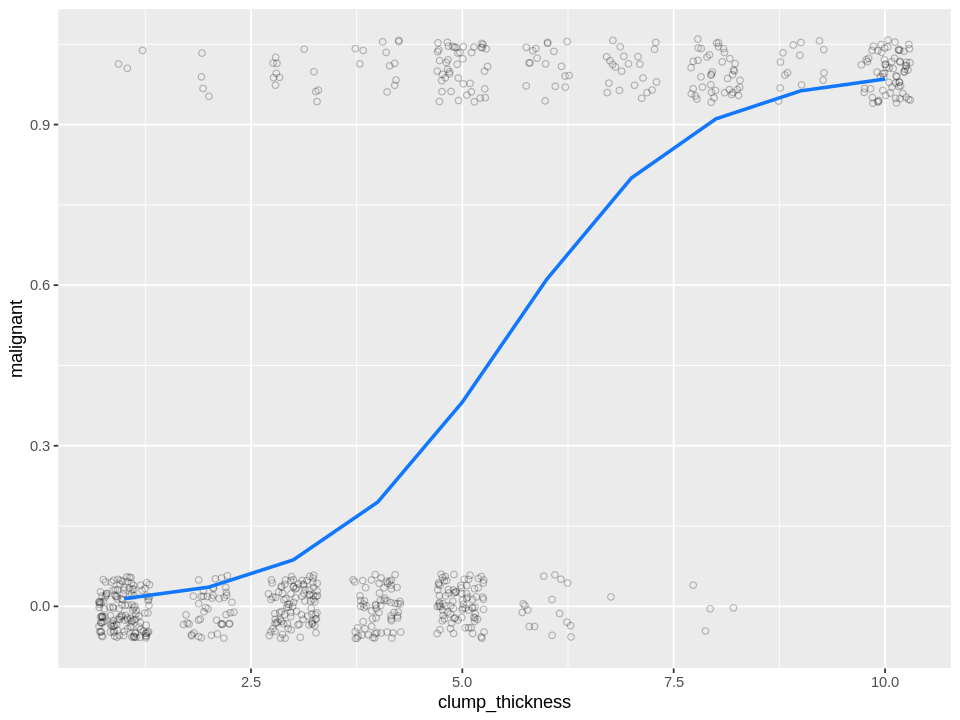

In [18]:
transmute(
  MASS::biopsy,
  clump_thickness = V1,
  malignant = recode(class, benign = 0, malignant = 1)
) %>%
  modelr::add_predictions(
    glm(malignant ~ clump_thickness, family = binomial, .),
    type = "response"
  ) %>%
  ggplot() +
  geom_jitter(aes(clump_thickness, malignant), alpha = .25, height = .06, shape = 21, size = 1.5, width = .3) +
  geom_line(aes(clump_thickness, pred), color = "#1177FF", size = 1)

## 5.8 Adding Fitted Lines from Multiple Existing Models

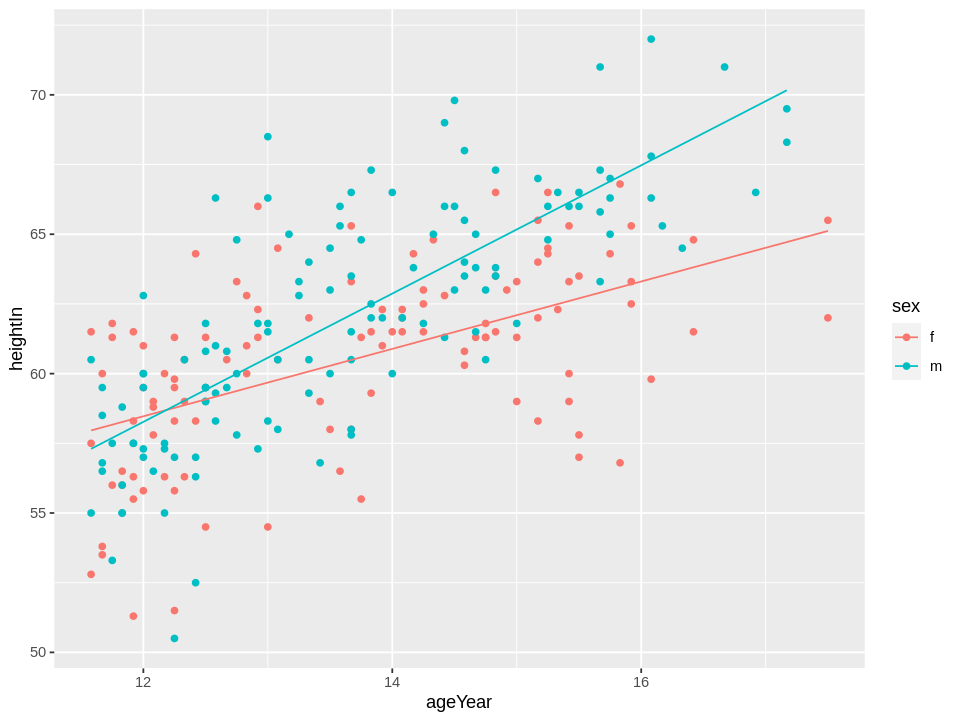

In [19]:
group_by(gcookbook::heightweight, sex) %>%
  group_modify(~modelr::add_predictions(., lm(heightIn ~ ageYear, .))) %>%
  ggplot() +
  geom_point(aes(ageYear, heightIn, color = sex)) +
  geom_line(aes(ageYear, pred, color = sex))

## 5.9 Adding Annotations with Model Coefficients

In [20]:
expression(r^2 == 0)
parse(text = "r^2 == 0")

expression(r^2 == 0)

expression(r^2 == 0)

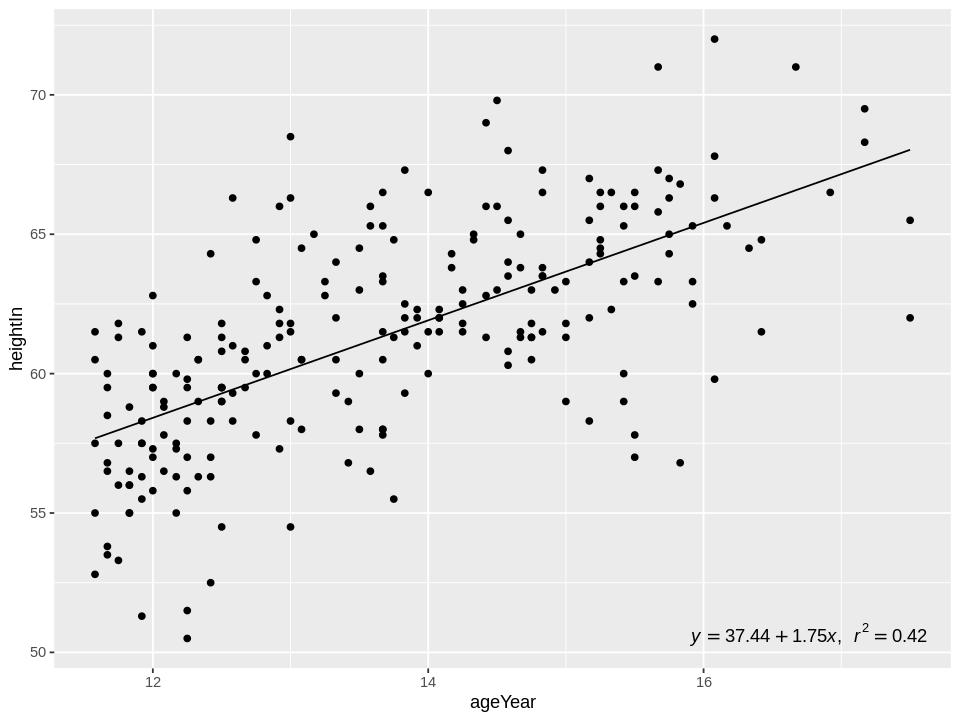

In [21]:
m <- lm(heightIn ~ ageYear, gcookbook::heightweight)

modelr::add_predictions(gcookbook::heightweight, m) %>%
  ggplot() +
  geom_point(aes(ageYear, heightIn)) +
  geom_line(aes(ageYear, pred)) +
  annotate(
    "text",
    x = Inf,
    y = -Inf,
    hjust = 1.1,
    vjust = -1,
    label = str_interp("italic(y) == $[.2f]{coef(m)[1]} + $[.2f]{coef(m)[2]} * italic(x) * ',' ~~ italic(r)^2 == $[.2f]{summary(m)$r.squared}"),
    parse = TRUE
  )

## 5.10 Adding Marginal Rugs to a Scatter Plot

> A marginal rug plot is essentially a one-dimensional scatter plot that can be used to visualize the distribution of data on each axis.

In [22]:
summary(faithful)
slice_sample(faithful, n = 10)
?faithful

   eruptions        waiting    
 Min.   :1.600   Min.   :43.0  
 1st Qu.:2.163   1st Qu.:58.0  
 Median :4.000   Median :76.0  
 Mean   :3.488   Mean   :70.9  
 3rd Qu.:4.454   3rd Qu.:82.0  
 Max.   :5.100   Max.   :96.0  

eruptions,waiting
<dbl>,<dbl>
4.900,89
2.283,62
2.800,56
4.133,75
1.750,47
2.333,64
1.883,51
4.583,85
4.250,83


faithful               package:datasets                R Documentation

_O_l_d _F_a_i_t_h_f_u_l _G_e_y_s_e_r _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Waiting time between eruptions and the duration of the eruption
     for the Old Faithful geyser in Yellowstone National Park, Wyoming,
     USA.

_U_s_a_g_e:

     faithful
     
_F_o_r_m_a_t:

     A data frame with 272 observations on 2 variables.

       [,1]  eruptions  numeric  Eruption time in mins 
       [,2]  waiting    numeric  Waiting time to next 
                                 eruption (in mins) 
      
_D_e_t_a_i_l_s:

     A closer look at ‘faithful$eruptions’ reveals that these are
     heavily rounded times originally in seconds, where multiples of 5
     are more frequent than expected under non-human measurement.  For
     a better version of the eruption times, see the example below.

     There are many versions of this dataset around: Azzalini and
     Bowman (1990) use a more complete version.

_S_o_u_r_c_e:

     W. Härdle.

_R_e_f_e_r_e_n_c_e_s:

     Härdle, W. (1991).  _Smoothing Techniques with Implementation in
     S_.  New York: Springer.

     Azzalini, A. and Bowman, A. W. (1990).  A look at some data on the
     Old Faithful geyser.  _Applied Statistics_, *39*, 357-365.  doi:
     10.2307/2347385 (URL: https://doi.org/10.2307/2347385).

_S_e_e _A_l_s_o:

     ‘geyser’ in package ‘MASS’ for the Azzalini-Bowman version.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     f.tit <-  "faithful data: Eruptions of Old Faithful"
     
     ne60 <- round(e60 <- 60 * faithful$eruptions)
     all.equal(e60, ne60)             # relative diff. ~ 1/10000
     table(zapsmall(abs(e60 - ne60))) # 0, 0.02 or 0.04
     faithful$better.eruptions <- ne60 / 60
     te <- table(ne60)
     te[te >= 4]                      # (too) many multiples of 5 !
     plot(names(te), te, type = "h", main = f.tit, xlab = "Eruption time (sec)")
     
     plot(faithful[, -3], main = f.tit,
          xlab = "Eruption time (min)",
          ylab = "Waiting time to next eruption (min)")
     lines(lowess(faithful$eruptions, faithful$waiting, f = 2/3, iter = 3),
           col = "red")

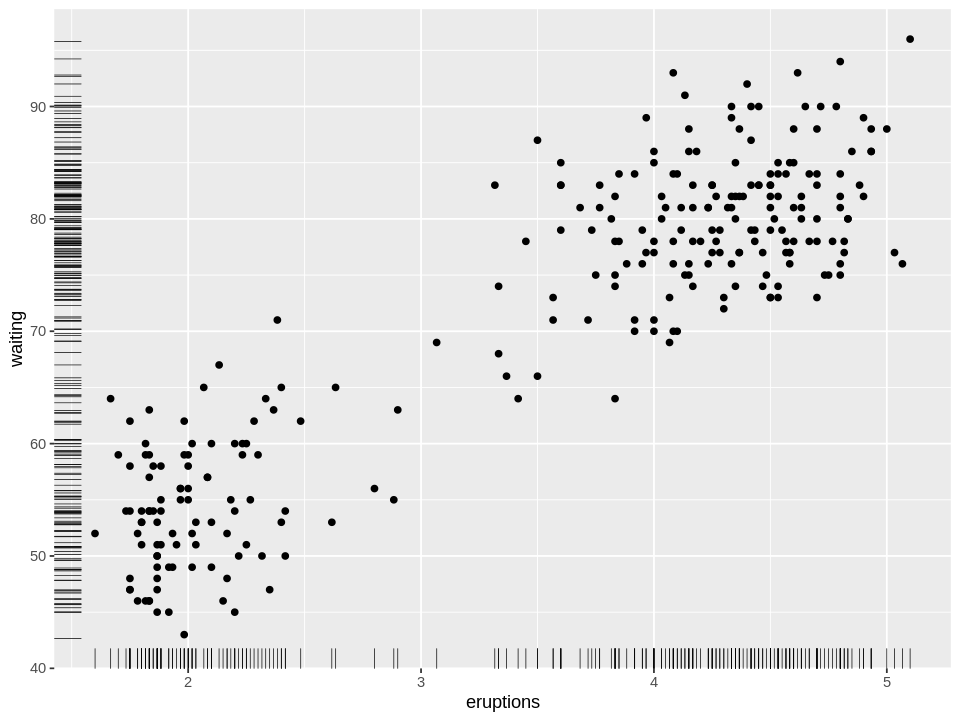

In [23]:
qplot(eruptions, waiting, data = faithful) +
  geom_rug(position = "jitter", size = .2)

## 5.11 Labeling Points in a Scatter Plot

In [24]:
summary(gcookbook::countries)
slice_sample(gcookbook::countries, n = 10)
?gcookbook::countries

             Name            Code            Year           GDP           
 Afghanistan   :   51   ABW    :   51   Min.   :1960   Min.   :    35.37  
 Albania       :   51   AFG    :   51   1st Qu.:1972   1st Qu.:   395.32  
 Algeria       :   51   AGO    :   51   Median :1985   Median :  1352.26  
 American Samoa:   51   ALB    :   51   Mean   :1985   Mean   :  5948.52  
 Andorra       :   51   AND    :   51   3rd Qu.:1998   3rd Qu.:  5194.29  
 Angola        :   51   ARE    :   51   Max.   :2010   Max.   :186242.93  
 (Other)       :10710   (Other):10710                  NA's   :2952       
   laborrate       healthexp        infmortality   
 Min.   :34.40   Min.   :   0.00   Min.   :  1.60  
 1st Qu.:57.20   1st Qu.:  34.06   1st Qu.:  9.70  
 Median :63.20   Median : 135.06   Median : 24.15  
 Mean   :63.79   Mean   : 616.86   Mean   : 36.78  
 3rd Qu.:70.20   3rd Qu.: 506.35   3rd Qu.: 58.73  
 Max.   :90.80   Max.   :8182.85   Max.   :159.40  
 NA's   :5526    NA's   :8205      N

Name,Code,Year,GDP,laborrate,healthexp,infmortality
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
France,FRA,1984,9265.3015,56.8,NA,NA
Iraq,IRQ,1998,457.3928,41.6,8.572465,35.1
Palau,PLW,1983,NA,NA,NA,NA
Algeria,DZA,1992,1807.4913,50.3,NA,NA
Seychelles,SYC,2001,7663.1371,NA,389.682843,11.6
Thailand,THA,1987,929.4972,81.3,NA,NA
Isle of Man,IMN,1984,NA,NA,NA,NA
Philippines,PHL,2008,1925.2134,63.8,68.025392,24.5
Tuvalu,TUV,1966,NA,NA,NA,NA


countries {gcookbook},R Documentation


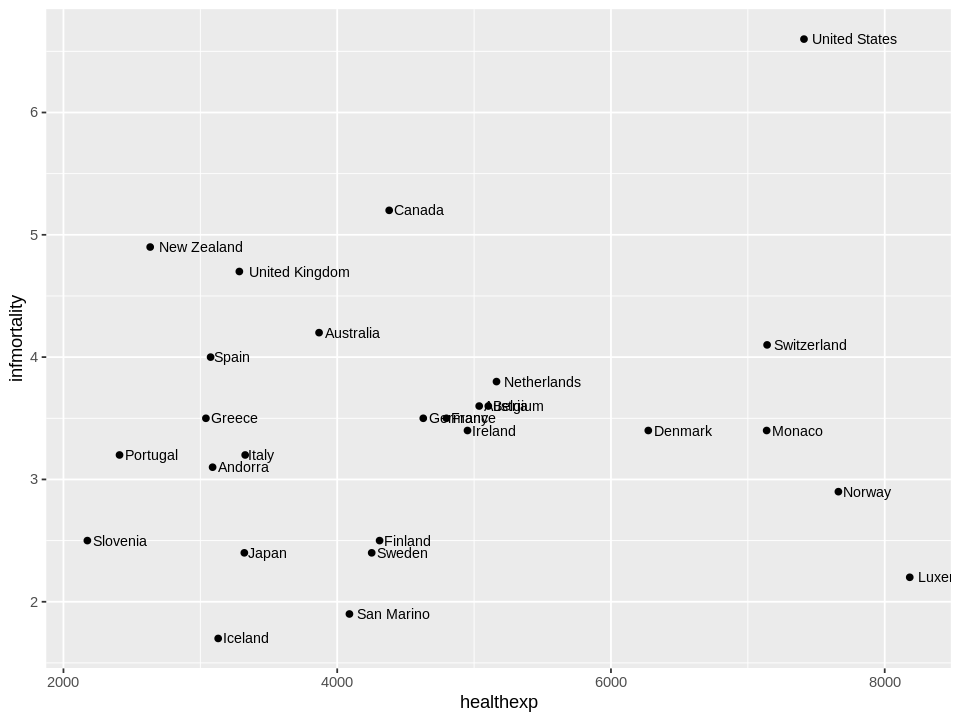

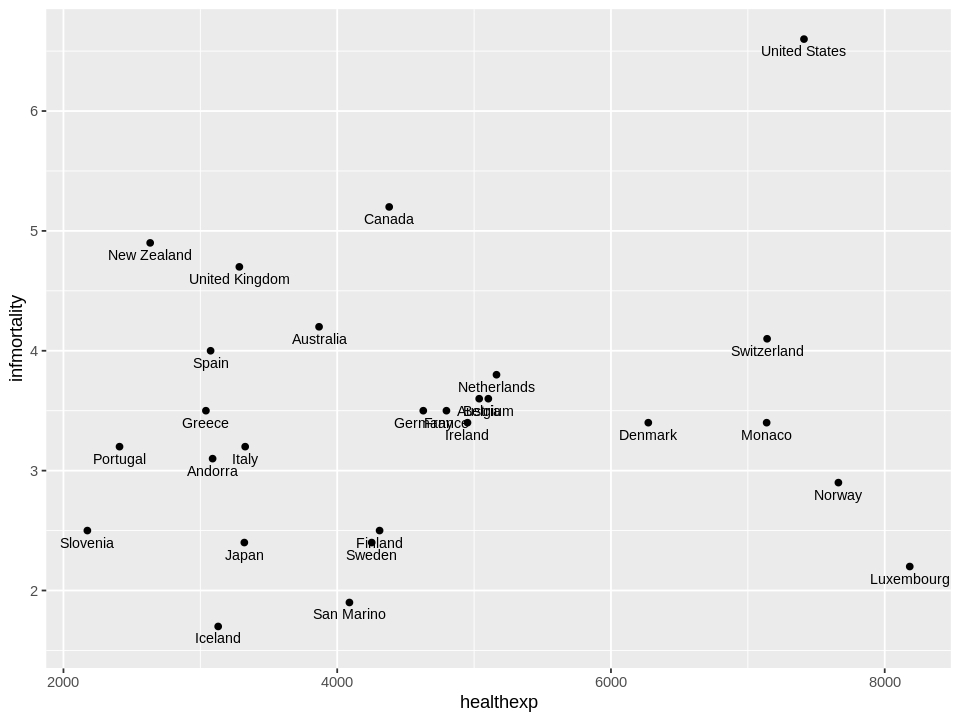

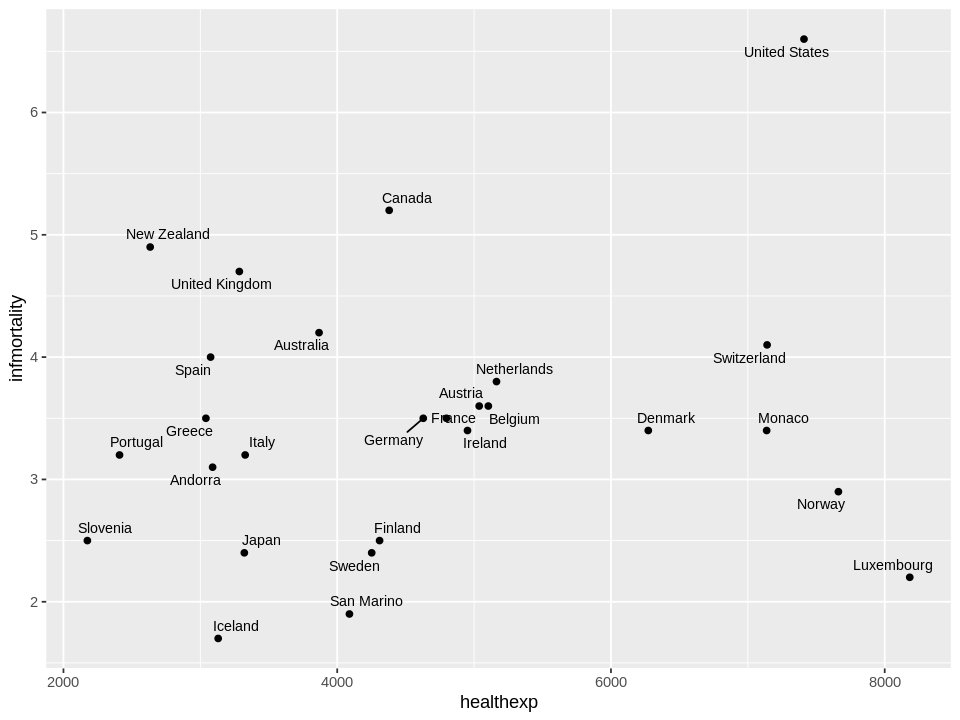

In [25]:
filter(gcookbook::countries, Year == 2009, healthexp > 2000) %>%
  qplot(healthexp, infmortality, data = .) +
  geom_text(aes(label = Name), hjust = -.1, size = 3)

filter(gcookbook::countries, Year == 2009, healthexp > 2000) %>%
  qplot(healthexp, infmortality, data = .) +
  geom_text(aes(label = Name), position = position_nudge(x = 0, y = -.1), size = 3)

filter(gcookbook::countries, Year == 2009, healthexp > 2000) %>%
  qplot(healthexp, infmortality, data = .) +
  ggrepel::geom_text_repel(aes(label = Name), size = 3)

## 5.12 Creating a Balloon Plot

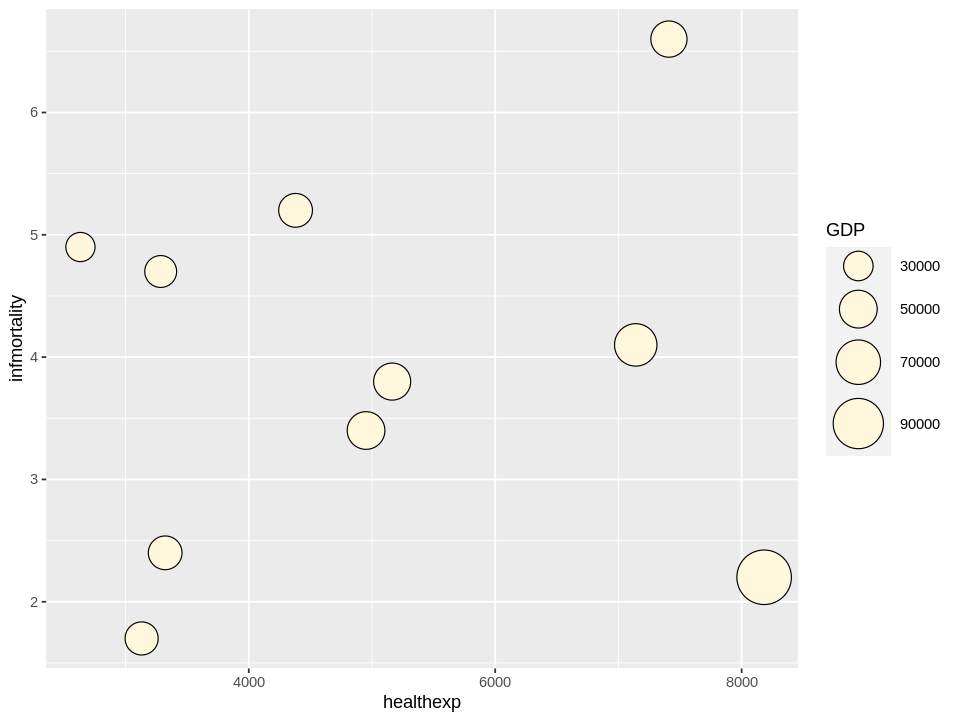

In [26]:
filter(gcookbook::countries, Year == 2009, Name %in% c(
  "Canada",
  "Iceland",
  "Ireland",
  "Japan",
  "Luxembourg",
  "Netherlands",
  "New Zealand",
  "Switzerland",
  "United Kingdom",
  "United States"
)) %>%
  ggplot(aes(healthexp, infmortality, size = GDP)) +
  geom_point(fill = "cornsilk", shape = 21) +
  scale_size_area(max_size = 15)

In [27]:
summary(HairEyeColor)
as_tibble(HairEyeColor) %>% slice_sample(n = 10)
?HairEyeColor

Number of cases in table: 592 
Number of factors: 3 
Test for independence of all factors:
	Chisq = 164.92, df = 24, p-value = 5.321e-23
	Chi-squared approximation may be incorrect

Hair,Eye,Sex,n
<chr>,<chr>,<chr>,<dbl>
Brown,Green,Male,15
Brown,Blue,Female,34
Brown,Blue,Male,50
Red,Blue,Male,10
Brown,Hazel,Female,29
Black,Hazel,Male,10
Red,Green,Male,7
Brown,Brown,Male,53
Black,Green,Male,3


HairEyeColor             package:datasets              R Documentation

_H_a_i_r _a_n_d _E_y_e _C_o_l_o_r _o_f _S_t_a_t_i_s_t_i_c_s _S_t_u_d_e_n_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     Distribution of hair and eye color and sex in 592 statistics
     students.

_U_s_a_g_e:

     HairEyeColor
     
_F_o_r_m_a_t:

     A 3-dimensional array resulting from cross-tabulating 592
     observations on 3 variables.  The variables and their levels are
     as follows:

       No  Name  Levels                    
        1  Hair  Black, Brown, Red, Blond  
        2  Eye   Brown, Blue, Hazel, Green 
        3  Sex   Male, Female              
      
_D_e_t_a_i_l_s:

     The Hair x Eye table comes from a survey of students at the
     University of Delaware reported by Snee (1974).  The split by
     ‘Sex’ was added by Friendly (1992a) for didactic purposes.

     This data set is useful for illustrating various techniques for
     the analysis of contingency tables, such as the standard
     chi-squared test or, more generally, log-linear modelling, and
     graphical methods such as mosaic plots, sieve diagrams or
     association plots.

_S_o_u_r_c_e:

     <URL:
     http://euclid.psych.yorku.ca/ftp/sas/vcd/catdata/haireye.sas>

     Snee (1974) gives the two-way table aggregated over ‘Sex’.  The
     ‘Sex’ split of the ‘Brown hair, Brown eye’ cell was changed to
     agree with that used by Friendly (2000).

_R_e_f_e_r_e_n_c_e_s:

     Snee, R. D. (1974).  Graphical display of two-way contingency
     tables.  _The American Statistician_, *28*, 9-12.  doi:
     10.2307/2683520 (URL: https://doi.org/10.2307/2683520).

     Friendly, M. (1992a).  Graphical methods for categorical data.
     _SAS User Group International Conference Proceedings_, *17*,
     190-200.  <URL: http://datavis.ca/papers/sugi/sugi17.pdf>

     Friendly, M. (1992b).  Mosaic displays for loglinear models.
     _Proceedings of the Statistical Graphics Section_, American
     Statistical Association, pp. 61-68.  <URL:
     http://www.math.yorku.ca/SCS/Papers/asa92.html>

     Friendly, M. (2000).  _Visualizing Categorical Data_.  SAS
     Institute, ISBN 1-58025-660-0.

_S_e_e _A_l_s_o:

     ‘chisq.test’, ‘loglin’, ‘mosaicplot’

_E_x_a_m_p_l_e_s:

     require(graphics)
     ## Full mosaic
     mosaicplot(HairEyeColor)
     ## Aggregate over sex (as in Snee's original data)
     x <- apply(HairEyeColor, c(1, 2), sum)
     x
     mosaicplot(x, main = "Relation between hair and eye color")

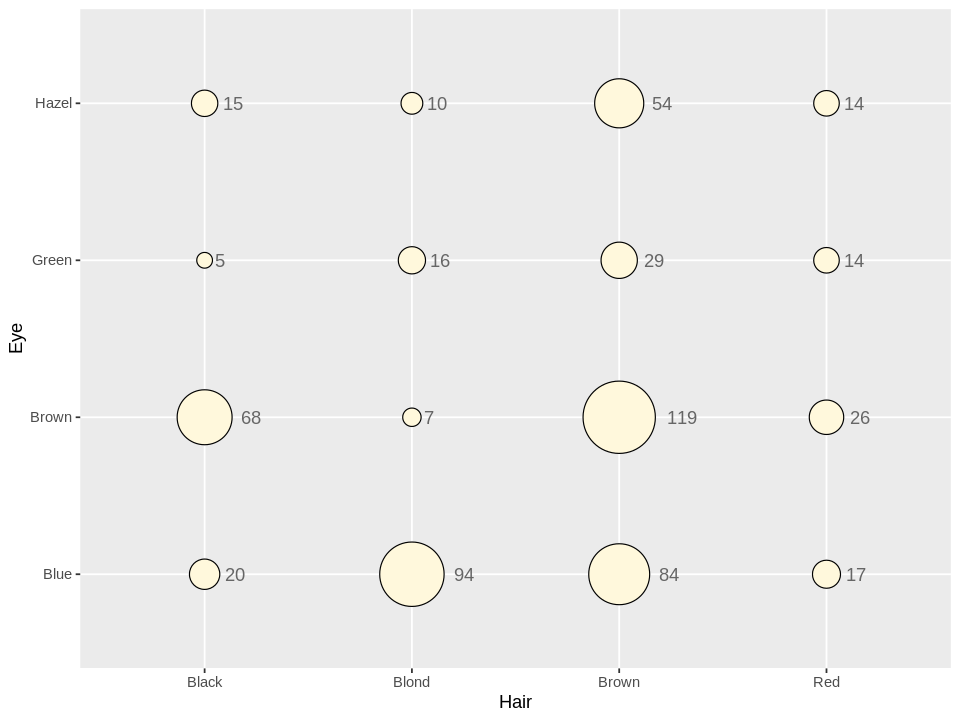

In [28]:
as_tibble(HairEyeColor) %>%
  group_by(Hair, Eye) %>%
  summarise(n = sum(n), .groups = "drop") %>%
  ggplot(aes(Hair, Eye)) +
  geom_point(aes(size = n), fill = "cornsilk", shape = 21) +
  scale_size_area(guide = FALSE, max_size = 20) +
  geom_text(aes(x = as.numeric(as.factor(Hair)) + sqrt(n) / 50, label = n), color = "grey40", hjust = -.1)

## 5.13 Making a Scatter Plot Matrix

> A scatter plot matrix is an excellent way of visualizing the pairwise relationships among several variables.

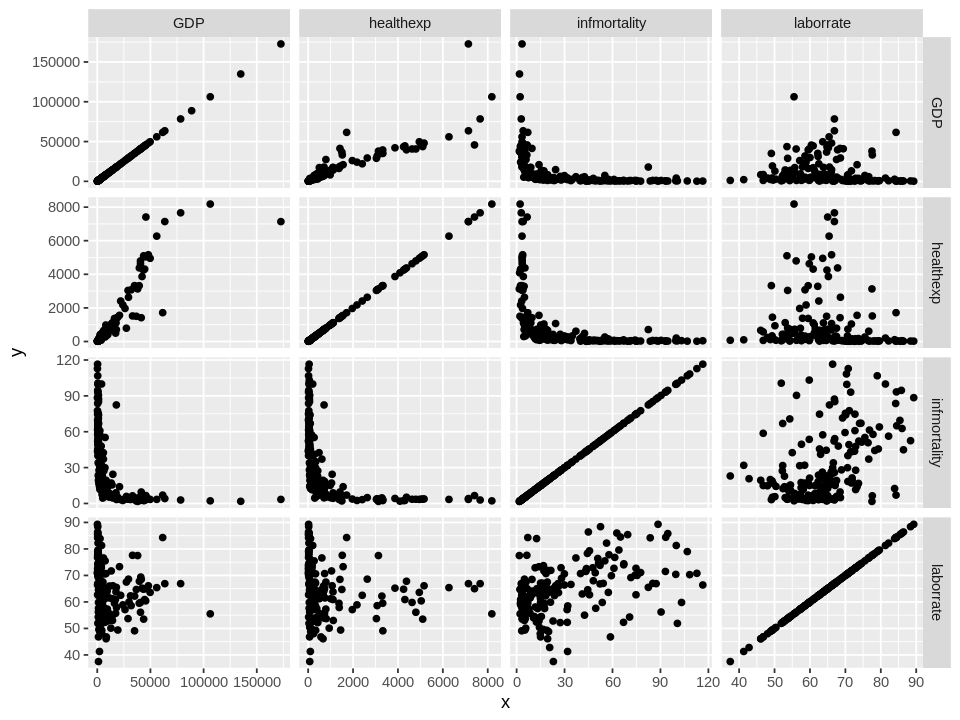

In [29]:
filter(gcookbook::countries, Year == 2009) %>%
  (function(df) {
    dplyr::left_join(
      pivot_longer(df, c("GDP", "healthexp", "infmortality", "laborrate"), names_to = "x_cat", values_to = "x"),
      pivot_longer(df, c("GDP", "healthexp", "infmortality", "laborrate"), names_to = "y_cat", values_to = "y"),
      by = c("Name", "Code", "Year")
    )
  }) %>%
  drop_na() %>%
  ggplot() +
  geom_point(aes(x, y)) +
  facet_grid(y_cat ~ x_cat, scales = "free")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



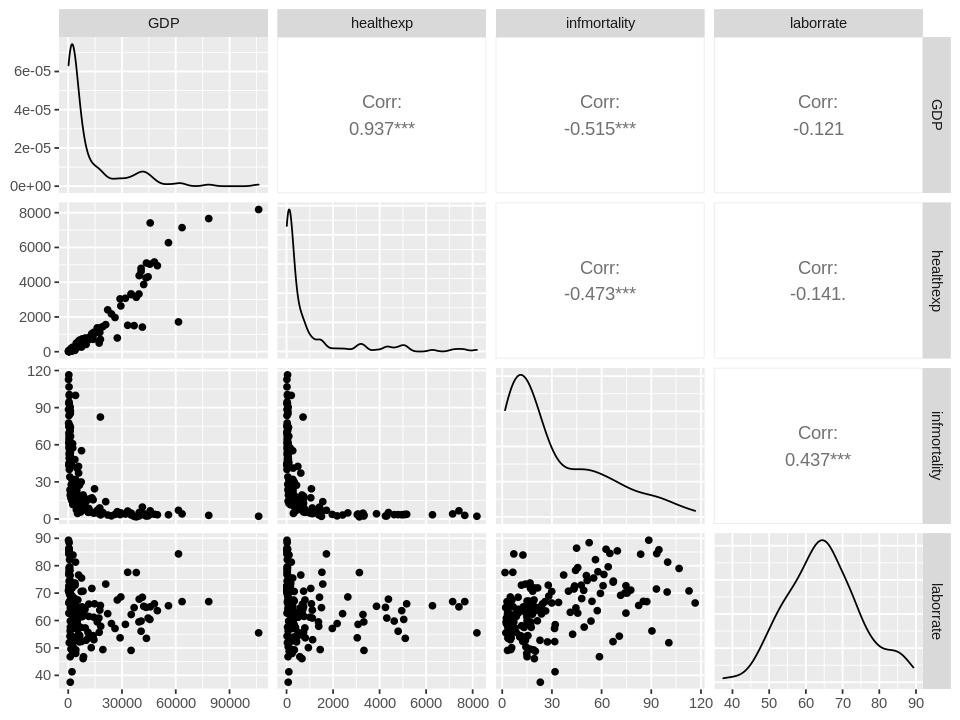

In [30]:
filter(gcookbook::countries, Year == 2009) %>%
  drop_na() %>%
  GGally::ggpairs(columns = c("GDP", "healthexp", "infmortality", "laborrate"))